In [445]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
print('Setup Complete')

Setup Complete


In [446]:
df = pd.read_csv(r'C:\Users\uniqu\Downloads\Coding Project Datasets\Road Traffic Accidents Classification\cleaned.csv')
df.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2


In [447]:
df.shape

(12316, 15)

In [448]:
df.columns

Index(['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [449]:
duplicates = df.duplicated()
print(duplicates.sum())

390


In [450]:
missing_values = df.isnull().sum()
missing_values

Age_band_of_driver         0
Sex_of_driver              0
Educational_level          0
Vehicle_driver_relation    0
Driving_experience         0
Lanes_or_Medians           0
Types_of_Junction          0
Road_surface_type          0
Light_conditions           0
Weather_conditions         0
Type_of_collision          0
Vehicle_movement           0
Pedestrian_movement        0
Cause_of_accident          0
Accident_severity          0
dtype: int64

In [451]:
duplicates = df.duplicated()
print(duplicates.sum())

390


In [452]:
df.drop_duplicates(inplace=True)

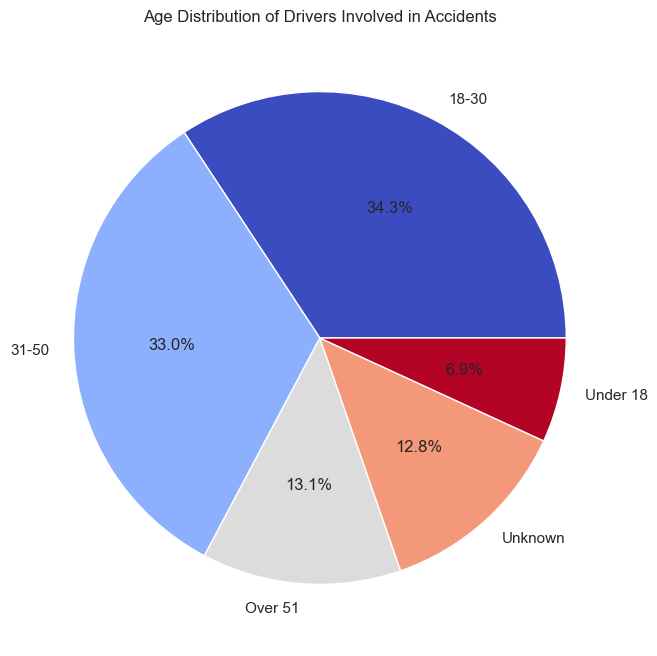

In [453]:
df['Age_band_of_driver'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8), cmap='coolwarm')
plt.title('Age Distribution of Drivers Involved in Accidents')
plt.ylabel('')
plt.show()

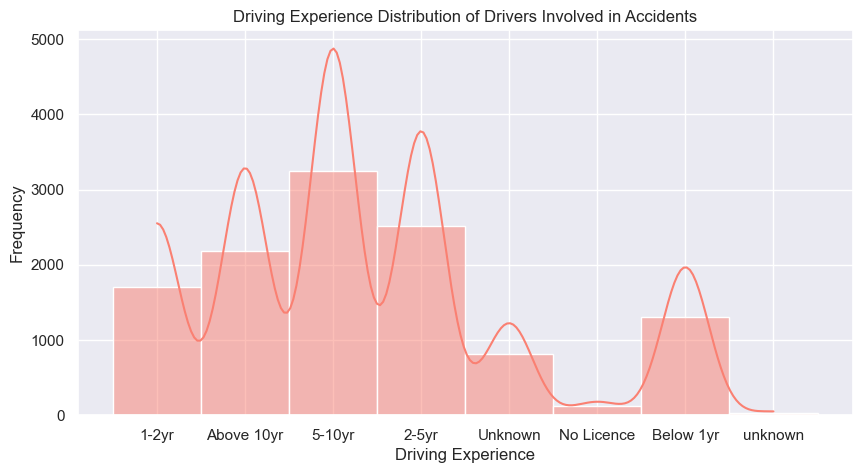

In [454]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Driving_experience'], bins=15, kde=True, color='salmon')
plt.title('Driving Experience Distribution of Drivers Involved in Accidents')
plt.xlabel('Driving Experience')
plt.ylabel('Frequency')
plt.show()

In [455]:
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le 

# Random Forest Modeling

In [456]:
X = df.drop(columns=['Accident_severity']) 
y = df['Accident_severity'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [457]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [458]:
y_pred_resampled = model.predict(X_test)

Accuracy: 0.8298407376362112
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.07      0.01      0.01       347
           2       0.84      0.99      0.91      2007

    accuracy                           0.83      2386
   macro avg       0.30      0.33      0.31      2386
weighted avg       0.72      0.83      0.76      2386

Confusion Matrix:


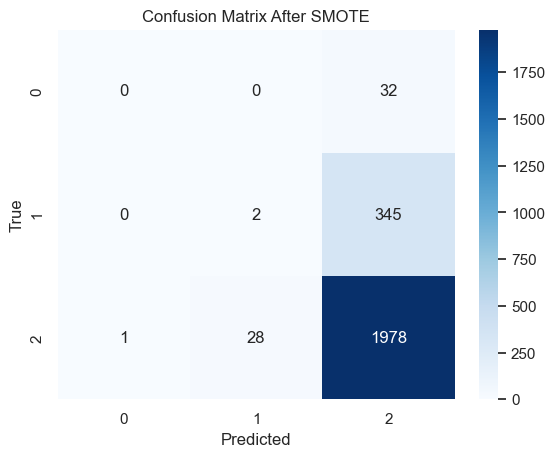

In [459]:
accuracy = accuracy_score(y_test, y_pred_resampled)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred_resampled))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_resampled)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix After SMOTE')
plt.show()
